In [2]:

# Import Libraries:
import coinmetrics # Coinmetrics API
from datetime import datetime, timedelta # Datetime Feature
import pandas as pd # Import Pandas
import panel as pn # Import Panel
import plotly.express as px # Import Plotly
pn.extension("plotly")# Import Plotly Extension
from pprint import pprint
import requests
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go


# Initialize a reference object (in this case `cm` for the Coinmetrics Community API)
cm = coinmetrics.Community()

In [3]:
# API INPUTS
asset = "btc"
begin_timestamp = (datetime.now() - timedelta(days=90)).date()
end_timestamp = (datetime.now() - timedelta(days=0)).date()
# end_timestamp = datetime.now().date()


# API OUTPUT
# asset_data = requests.get(f"https://community-api.coinmetrics.io/v4/timeseries/market-candles?start_time={begin_timestamp}&paging_from=start&markets=coinbase-{asset}-usd-spot&pretty=true").json()
asset_data = requests.get(f"https://community-api.coinmetrics.io/v4/timeseries/market-candles?start_time={begin_timestamp}&end_time={end_timestamp}&paging_from=start&markets=coinbase-{asset}-usd-spot&pretty=true").json()


In [4]:
# Initiate clean dictionary
data_dictionary = {
    "date" : [],
    "open" : [],
    "close" : [],
    "high" : [],
    "low" : [],
    "volume" : [],
    "vwap" : [], 
}

# Use For Loop to interate through data into dictionary
for entry in asset_data['data']:
    data_dictionary['date'].append(entry['time'])
    data_dictionary['open'].append(float(entry['price_open']))
    data_dictionary['close'].append(float(entry['price_close']))
    data_dictionary['high'].append(float(entry['price_high']))
    data_dictionary['low'].append(float(entry['price_low']))
    data_dictionary['volume'].append(float(entry['volume']))
    data_dictionary['vwap'].append(float(entry['vwap']))


    
#     {'data': [{'candle_trades_count': '301135',
#            'candle_usd_volume': '547725314.072704441370172316698874',
#            'market': 'coinbase-btc-usd-spot',
#            'price_close': '47833.64',
#            'price_high': '47953.9',
#            'price_low': '44249.64',
#            'price_open': '44422.15',
#            'time': '2021-08-13T00:00:00.000000000Z',
#            'volume': '11794.94196257',
#            'vwap': '46437.30472018029'},

asset_data_df = pd.DataFrame.from_dict(data_dictionary)
pd.options.display.float_format = "{:,.2f}".format
# INSERT HERE >>> FIND WAY TO CLEAN DATE DATA
asset_data_df.tail()

,date,open,close,high,low,volume,vwap
85,2021-11-07T00:00:00.000000000Z,"61,539.30","63,309.13","63,327.96","61,397.86","5,596.02","62,249.87"
86,2021-11-08T00:00:00.000000000Z,"63,309.12","67,554.84","67,792.77","63,309.12","17,661.87","65,687.68"
87,2021-11-09T00:00:00.000000000Z,"67,554.13","66,944.67","68,568.85","66,261.79","14,996.63","67,466.34"
88,2021-11-10T00:00:00.000000000Z,"66,938.76","64,912.20","69,000.00","62,800.00","19,030.25","66,764.93"
89,2021-11-11T00:00:00.000000000Z,"64,912.20","64,807.74","65,600.00","64,133.78","10,259.51","64,897.58"


In [5]:
bb_df= asset_data_df

In [6]:
def sma(data, window):
    return(data.rolling(window = window).mean())
sma(bb_df['close'], window = 20)

bb_df['sma'] = sma(bb_df['close'],20)
bb_df.tail()

,date,open,close,high,low,volume,vwap,sma
85,2021-11-07T00:00:00.000000000Z,"61,539.30","63,309.13","63,327.96","61,397.86","5,596.02","62,249.87","61,890.37"
86,2021-11-08T00:00:00.000000000Z,"63,309.12","67,554.84","67,792.77","63,309.12","17,661.87","65,687.68","62,052.96"
87,2021-11-09T00:00:00.000000000Z,"67,554.13","66,944.67","68,568.85","66,261.79","14,996.63","67,466.34","62,098.87"
88,2021-11-10T00:00:00.000000000Z,"66,938.76","64,912.20","69,000.00","62,800.00","19,030.25","66,764.93","62,234.27"
89,2021-11-11T00:00:00.000000000Z,"64,912.20","64,807.74","65,600.00","64,133.78","10,259.51","64,897.58","62,440.28"


In [7]:
def bb(data, sma, window):
    std = data.rolling(window=window).std()
    upper_band = sma + std * 2
    lower_band = sma -std * 2
    return upper_band, lower_band
bb_df['upper_band'],bb_df['lower_band'] = bb(bb_df['close'], bb_df['sma'],20)
bb_df.tail()

,date,open,close,high,low,volume,vwap,sma,upper_band,lower_band
85,2021-11-07T00:00:00.000000000Z,"61,539.30","63,309.13","63,327.96","61,397.86","5,596.02","62,249.87","61,890.37","65,155.88","58,624.87"
86,2021-11-08T00:00:00.000000000Z,"63,309.12","67,554.84","67,792.77","63,309.12","17,661.87","65,687.68","62,052.96","66,063.15","58,042.77"
87,2021-11-09T00:00:00.000000000Z,"67,554.13","66,944.67","68,568.85","66,261.79","14,996.63","67,466.34","62,098.87","66,316.25","57,881.48"
88,2021-11-10T00:00:00.000000000Z,"66,938.76","64,912.20","69,000.00","62,800.00","19,030.25","66,764.93","62,234.27","66,635.76","57,832.79"
89,2021-11-11T00:00:00.000000000Z,"64,912.20","64,807.74","65,600.00","64,133.78","10,259.51","64,897.58","62,440.28","66,921.92","57,958.64"


In [8]:
bb_df.dropna(inplace=True)
bb_df = bb_df.set_index(pd.DatetimeIndex(bb_df['date']))
df= bb_df

In [12]:
def signals(data, lower_band, upper_band):
    buy_price = []
    sell_price = []
    signal = 0

    for i in range(len(data)):
        
        if df['close'][i] < df['lower_band'][i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
           
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                signal = 0
            
        elif df['close'][i] > df['upper_band'][i]:
            if signal !=-1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
            
            else: 
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                signal = 0
        
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            signal = 0
        
    return buy_price, sell_price, signal
   
    

        

df['buy_price'],df['sell_price'],df['signal'] = signals(df['close'], df['lower_band'], df['upper_band'])

In [13]:
df

,date,open,close,high,low,volume,vwap,sma,upper_band,lower_band,buy_price,sell_price,signal
date,,,,,,,,,,,,,
2021-09-02 00:00:00+00:00,2021-09-02T00:00:00.000000000Z,"48,834.27","49,279.37","50,392.19","48,620.73","14,120.38","49,684.35","47,787.33","50,844.42","44,730.24",NaN,NaN,0
2021-09-03 00:00:00+00:00,2021-09-03T00:00:00.000000000Z,"49,279.38","50,025.00","51,064.44","48,349.66","14,577.23","50,032.04","47,933.10","51,129.00","44,737.20",NaN,NaN,0
2021-09-04 00:00:00+00:00,2021-09-04T00:00:00.000000000Z,"50,025.00","49,942.98","50,558.75","49,400.00","7,595.49","50,014.31","48,079.52","51,365.30","44,793.75",NaN,NaN,0
2021-09-05 00:00:00+00:00,2021-09-05T00:00:00.000000000Z,"49,944.89","51,789.17","51,907.08","49,500.00","7,743.93","50,658.49","48,373.86","51,885.40","44,862.32",NaN,NaN,0
2021-09-06 00:00:00+00:00,2021-09-06T00:00:00.000000000Z,"51,789.17","52,698.81","52,802.03","51,020.08","9,571.75","51,859.41","48,775.22","52,339.61","45,210.83",NaN,"52,698.81",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-07 00:00:00+00:00,2021-11-07T00:00:00.000000000Z,"61,539.30","63,309.13","63,327.96","61,397.86","5,596.02","62,249.87","61,890.37","65,155.88","58,624.87",NaN,NaN,0
2021-11-08 00:00:00+00:00,2021-11-08T00:00:00.000000000Z,"63,309.12","67,554.84","67,792.77","63,309.12","17,661.87","65,687.68","62,052.96","66,063.15","58,042.77",NaN,"67,554.84",0
2021-11-09 00:00:00+00:00,2021-11-09T00:00:00.000000000Z,"67,554.13","66,944.67","68,568.85","66,261.79","14,996.63","67,466.34","62,098.87","66,316.25","57,881.48",NaN,NaN,0


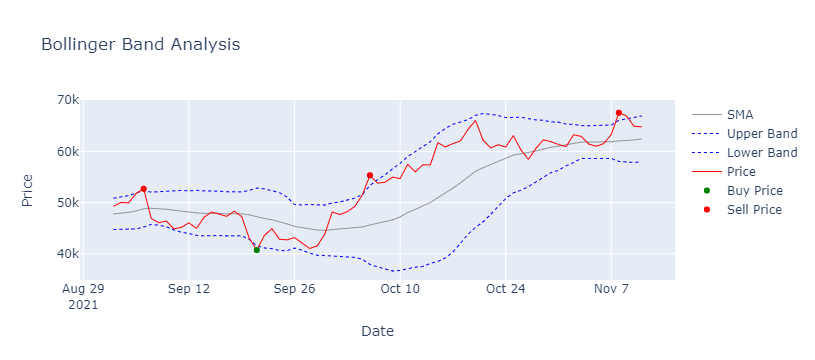

In [14]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y= df['sma'], line=dict (color='grey', width=.8), name = 'SMA'))
fig.add_trace(go.Scatter(x=df.index, y= df['upper_band'], line=dict (color='blue', width=1, dash='dot'), name = 'Upper Band'))
fig.add_trace(go.Scatter(x=df.index, y= df['lower_band'], line=dict (color='blue', width=1, dash='dot'), name = 'Lower Band'))
fig.add_trace(go.Scatter(x=df.index, y= df['close'], line=dict (color='red', width=1), name = 'Price'))


fig.add_trace(go.Scatter(x=df.index, y=df['buy_price'],mode='markers',marker=dict(color='Green'),name='Buy Price'))

fig.add_trace(go.Scatter(x=df.index, y=df['sell_price'], mode='markers',marker=dict(color='Red'), name='Sell Price'))


#fig.add_trace(go.Candlestick(x=df.index, open= df['open'],high=df['high'], low= df['low'], close=df['close'], name = 'Price'))


fig.update_layout(title='Bollinger Band Analysis',xaxis_title='Date',yaxis_title='Price')





fig.show()